In [313]:
# https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset
#utilities
import pandas as pd
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Machine Learning
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [314]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("online_shoppers_intention.csv")
df

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,Nov,2,2,3,11,Returning_Visitor,False,False


In [263]:
"""
Administrative : This is the number of pages of this type (administrative) that the user visited.
Administrative_Duration : This is the amount of time spent in this category of pages.
Informational : This is the number of pages of this type (informational) that the user visited.
Informational_Duration : This is the amount of time spent in this category of pages.
ProductRelated : This is the number of pages of this type (product related) that the user visited.
ProductRelated_Duration : This is the amount of time spent in this category of pages.
BounceRates  : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
ExitRates  : The percentage of pageviews on the website that end at that specific page.
PageValues  : The average value of the page averaged over the value of the target page and/or the completion of an eCommerce
SpecialDay : This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in
 --The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor,
  a Boolean value indicating whether the date of the visit is weekend, and month of the year.
Month :  
OperatingSystems  : 
Browser  : 
Region  : 
TrafficType :  
VisitorType :  
Weekend :   
Revenue :  
"""

"\nAdministrative : This is the number of pages of this type (administrative) that the user visited.\nAdministrative_Duration : This is the amount of time spent in this category of pages.\nInformational : This is the number of pages of this type (informational) that the user visited.\nInformational_Duration : This is the amount of time spent in this category of pages.\nProductRelated : This is the number of pages of this type (product related) that the user visited.\nProductRelated_Duration : This is the amount of time spent in this category of pages.\nBounceRates  : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.\nExitRates  : The percentage of pageviews on the website that end at that specific page.\nPageValues  : The average value of the page averaged over the value of the target page and/or the completion of an eCommerce\nSpecialDay : This value represents the closeness of the browsing date to special days or holi

In [315]:
df.info(); # we have 2 boolean and 2 object type features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [316]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.00,2.32,3.32,0.00,0.00,1.00,4.00,27.00
Administrative_Duration,12330.00,80.82,176.78,0.00,0.00,7.50,93.26,3398.75
Informational,12330.00,0.50,1.27,0.00,0.00,0.00,0.00,24.00
Informational_Duration,12330.00,34.47,140.75,0.00,0.00,0.00,0.00,2549.38
ProductRelated,12330.00,31.73,44.48,0.00,7.00,18.00,38.00,705.00
ProductRelated_Duration,12330.00,1194.75,1913.67,0.00,184.14,598.94,1464.16,63973.52
BounceRates,12330.00,0.02,0.05,0.00,0.00,0.00,0.02,0.20
ExitRates,12330.00,0.04,0.05,0.00,0.01,0.03,0.05,0.20
PageValues,12330.00,5.89,18.57,0.00,0.00,0.00,0.00,361.76
SpecialDay,12330.00,0.06,0.20,0.00,0.00,0.00,0.00,1.00


In [265]:
df.isnull().sum() # Hell yeah no null value :)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [267]:
df.nunique() # we can look at Administrative,Informational,Month,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

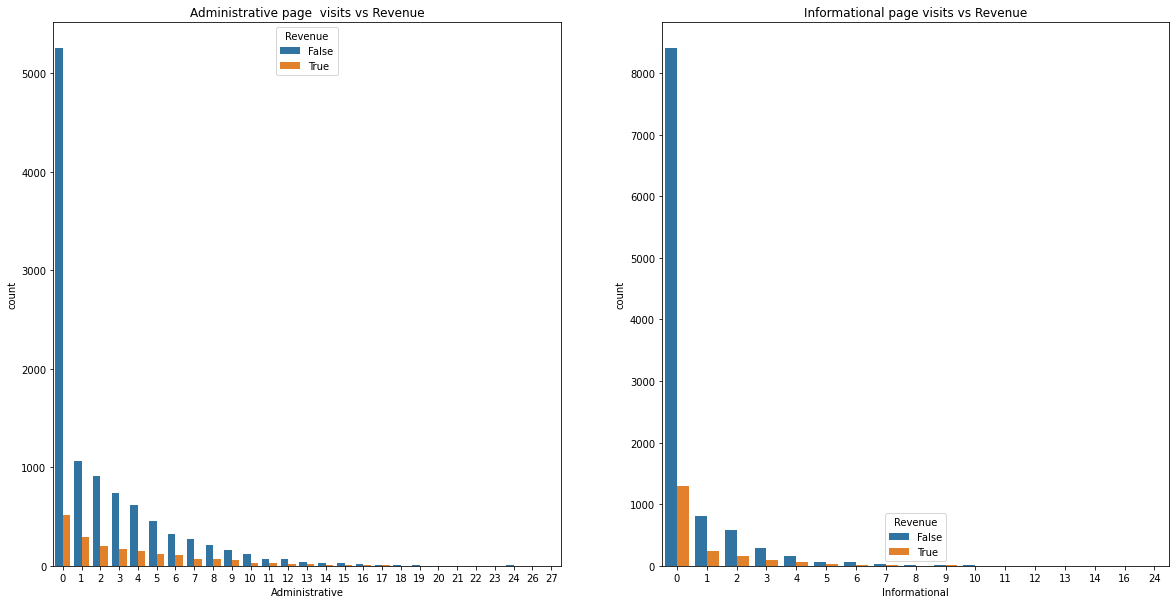

In [268]:
plt.figure(figsize = (20,10)) # Figure size
plt.subplot(1,2,1) # first image
plt.title('Administrative page  visits vs Revenue') # title of first image
sns.countplot(x= 'Administrative', hue = 'Revenue', data = df) # count plot administrative vs revenue
plt.subplot(1,2,2) #plot second image
plt.title('Informational page visits vs Revenue') # title of second image
sns.countplot(x= 'Informational', hue = 'Revenue', data = df)# count plot of informational vs revenue
plt.show()

In [269]:
# Calculate perc.
df_grouped = df.groupby(['Administrative', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Chose true values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
# Sorting
df_sorted = df_true.3sort_values(ascending=False)
df_sorted.head(10)

Administrative  Revenue
26              True      100.00
22              True       50.00
20              True       50.00
13              True       33.93
16              True       33.33
11              True       29.52
14              True       27.27
9               True       27.11
6               True       25.69
8               True       25.44
dtype: float64

In [270]:
# Calculate perc.
df_grouped = df.groupby(['Informational', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Choose true values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
# Sorting
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head(10)

Informational  Revenue
9              True      40.00
12             True      40.00
5              True      31.31
8              True      28.57
10             True      28.57
4              True      27.93
3              True      24.47
1              True      22.67
6              True      21.79
2              True      21.15
dtype: float64

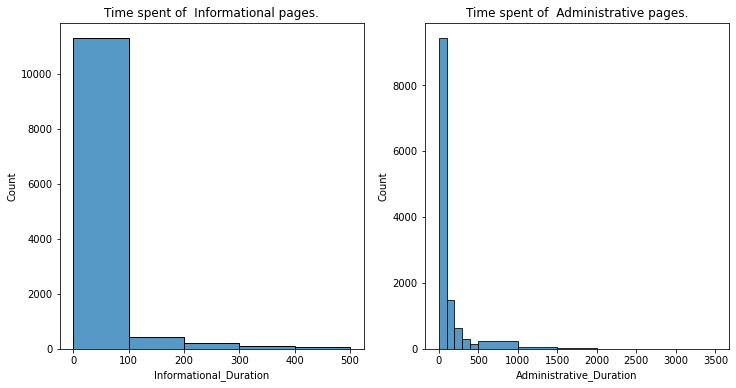

In [271]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(df['Informational_Duration'], bins = [0,100,200,300,400,500])
plt.title('Time spent of  Informational pages.')
plt.subplot(1,2,2)
sns.histplot(df['Administrative_Duration'], bins = [0,100,200,300,400,500,1000,1500,2000,3000,3500])
plt.title('Time spent of  Administrative pages.')
plt.show()

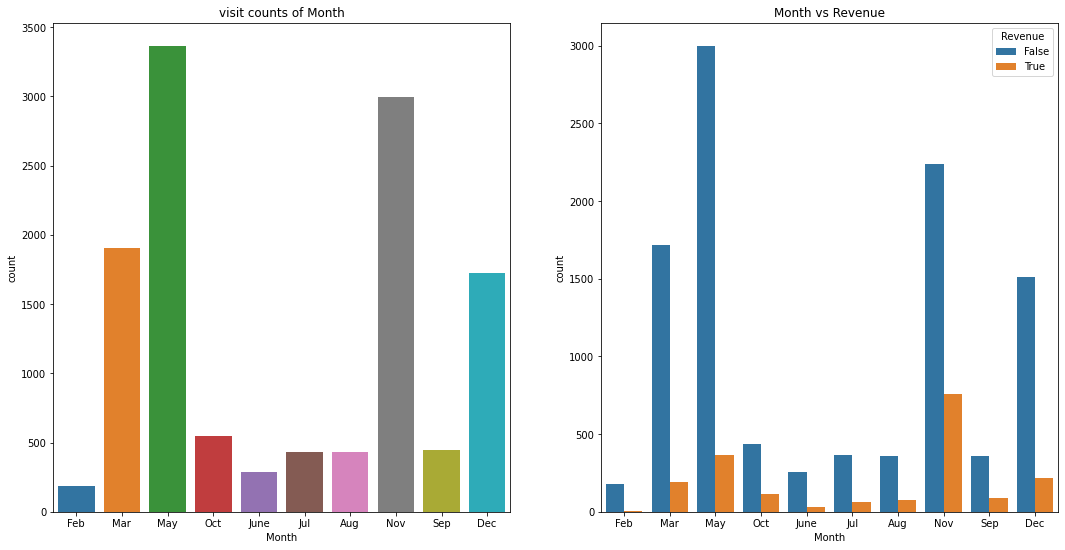

In [317]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('visit counts of Month')
sns.countplot(df['Month'])
plt.subplot(1,2,2)
plt.title('Month vs Revenue')
sns.countplot(x= 'Month', hue = 'Revenue', data = df)
plt.show()

In [273]:
# Calculate perc.
df_grouped = df.groupby(['Month', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Choose true values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
# Sorting
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

Month  Revenue
Nov    True      25.35
Oct    True      20.95
Sep    True      19.20
Aug    True      17.55
Jul    True      15.28
dtype: float64

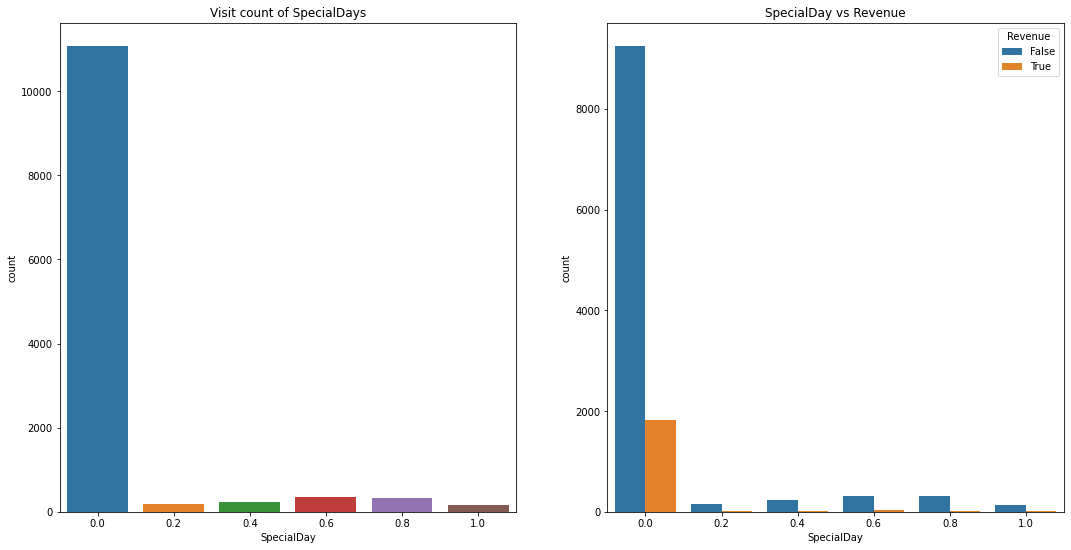

In [318]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('Visit count of SpecialDays')
sns.countplot(df['SpecialDay'])
plt.subplot(1,2,2)
plt.title('SpecialDay vs Revenue')
sns.countplot(x= 'SpecialDay', hue = 'Revenue', data = df)
plt.show()

In [275]:
# Yüzdeleri hesaplayın
df_grouped = df.groupby(['SpecialDay', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Choose true values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]

# Sıralamayı yapın
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

SpecialDay  Revenue
0.00        True      16.53
0.60        True       8.26
0.20        True       7.87
1.00        True       6.49
0.40        True       5.35
dtype: float64

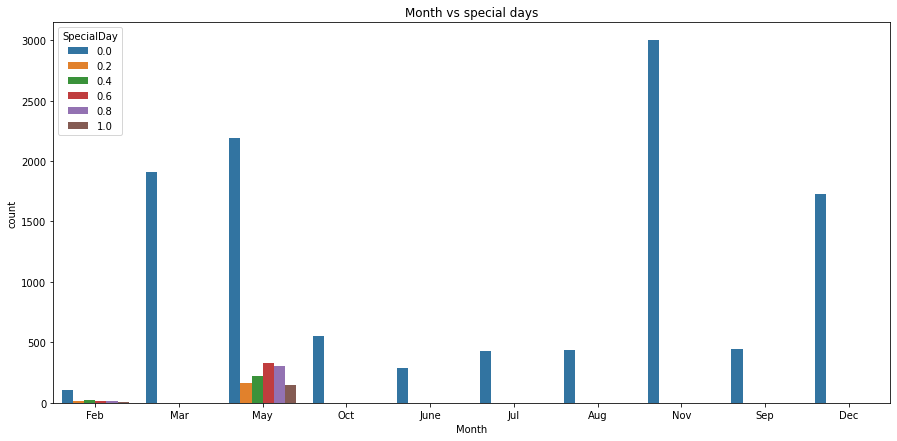

In [276]:
plt.figure(figsize=(15,7))
plt.title("Month vs special days")
sns.countplot(x="Month", hue="SpecialDay", data=df)
plt.show()

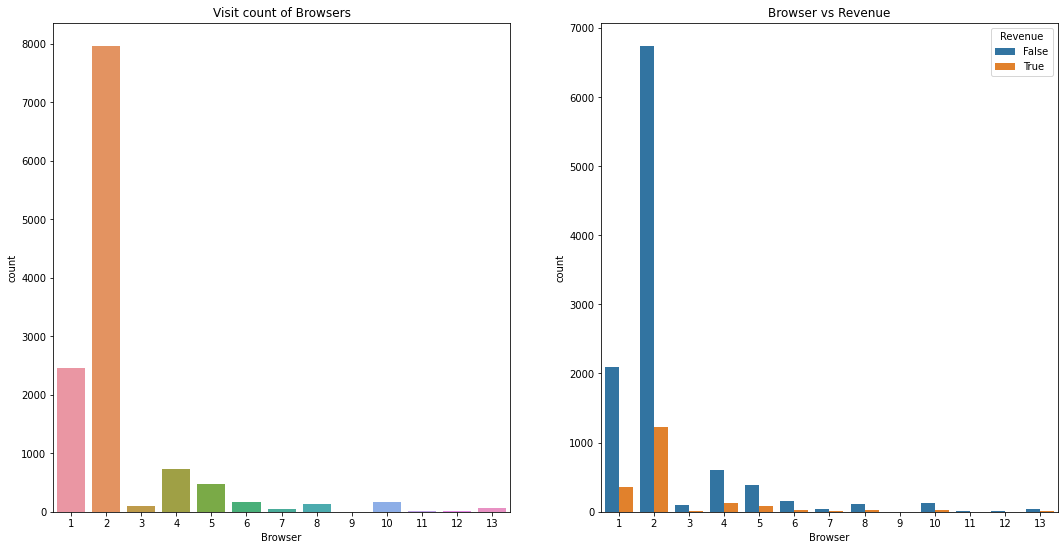

In [319]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('Visit count of Browsers')
sns.countplot(df['Browser'])
plt.subplot(1,2,2)
plt.title('Browser vs Revenue')
sns.countplot(x= 'Browser', hue = 'Revenue', data = df)
plt.show()

In [278]:
# Calculate perc.
df_grouped = df.groupby(['Browser', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#Choose True values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
#Sorting
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

Browser  Revenue
12       True      30.00
13       True      26.23
10       True      19.63
5        True      18.42
4        True      17.66
dtype: float64

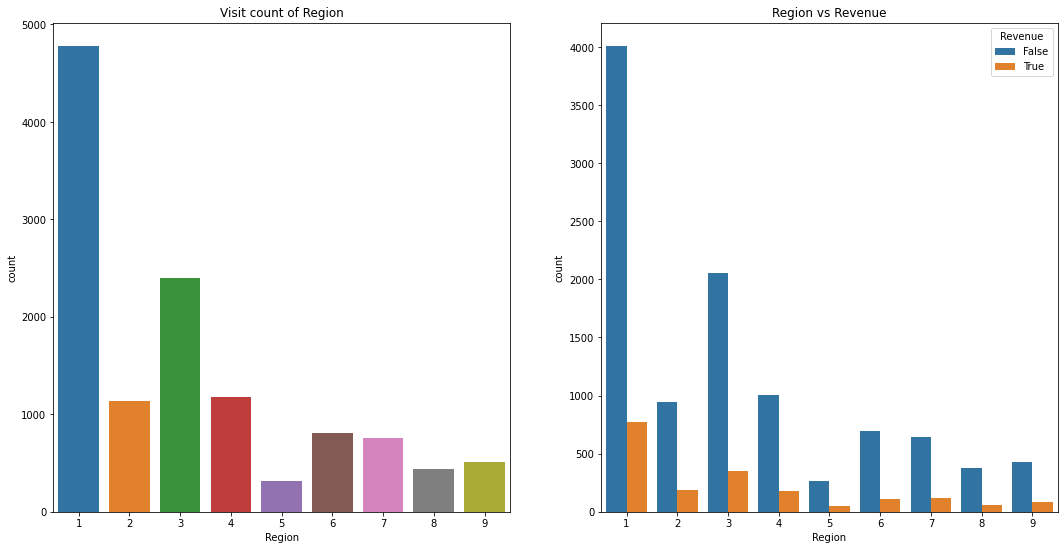

In [320]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('Visit count of Region')
sns.countplot(df['Region'])
plt.subplot(1,2,2)
plt.title('Region vs Revenue')
sns.countplot(x= 'Region', hue = 'Revenue', data = df)
plt.show()

In [280]:
#Calculate rate
df_grouped = df.groupby(['Region', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Chosse True Values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
# Sorting
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

Region  Revenue
9       True      16.83
2       True      16.55
5       True      16.35
1       True      16.13
7       True      15.64
dtype: float64

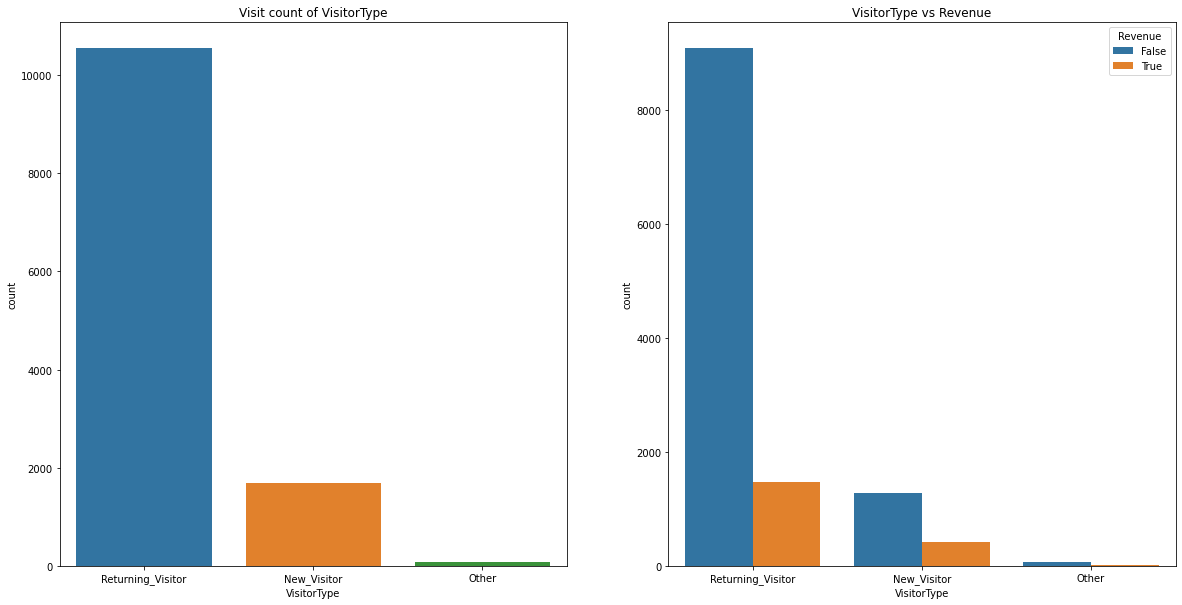

In [281]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Visit count of VisitorType')
sns.countplot(df['VisitorType'])
plt.subplot(1,2,2)
plt.title('VisitorType vs Revenue')
sns.countplot(x= 'VisitorType', hue = 'Revenue', data = df)
plt.show()

In [282]:
# Yüzdeleri hesaplayın
df_grouped = df.groupby(['VisitorType', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# True değerlerini seçin
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]

# Sıralamayı yapın
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

VisitorType        Revenue
New_Visitor        True      24.91
Other              True      18.82
Returning_Visitor  True      13.93
dtype: float64

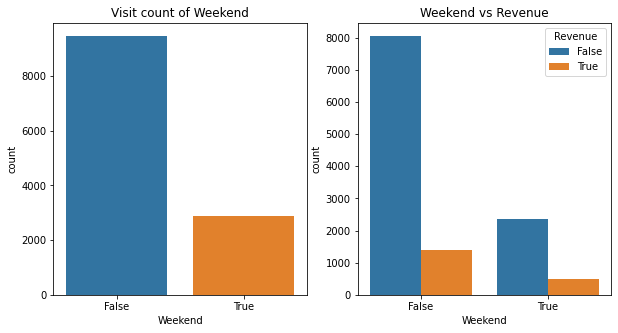

In [283]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Visit count of Weekend')
sns.countplot(df['Weekend'])
plt.subplot(1,2,2)
plt.title('Weekend vs Revenue')
sns.countplot(x= 'Weekend', hue = 'Revenue', data = df)
plt.show()

In [284]:
# Calculate perc
df_grouped = df.groupby(['Weekend', 'Revenue']).size()
df_grouped_pct = df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Choose True values
df_true = df_grouped_pct[df_grouped_pct.index.get_level_values(1) == True]
# Sorting
df_sorted = df_true.sort_values(ascending=False)
df_sorted.head()

Weekend  Revenue
True     True      17.40
False    True      14.89
dtype: float64

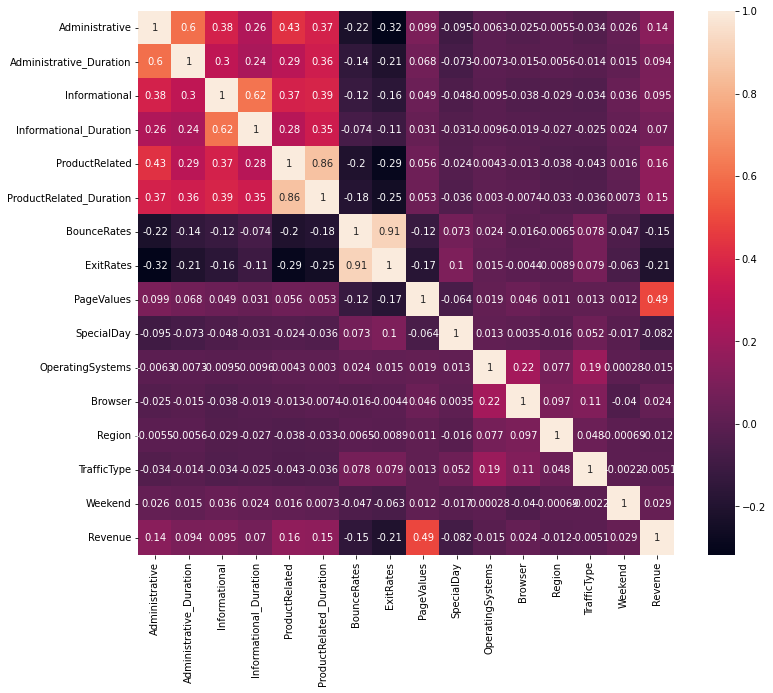

In [285]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot=True) # we can not understand anything right ?

In [286]:
df_corr=df.corr()# So need find maximum values
df_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,-0.09,-0.01,-0.03,-0.01,-0.03,0.03,0.14
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,-0.07,-0.01,-0.02,-0.01,-0.01,0.01,0.09
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,-0.05,-0.01,-0.04,-0.03,-0.03,0.04,0.10
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,-0.03,-0.01,-0.02,-0.03,-0.02,0.02,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,-0.02,0.00,-0.01,-0.04,-0.04,0.02,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,-0.04,0.00,-0.01,-0.03,-0.04,0.01,0.15
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,0.07,0.02,-0.02,-0.01,0.08,-0.05,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,0.10,0.01,-0.00,-0.01,0.08,-0.06,-0.21
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.05,0.01,0.01,0.01,0.49
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,1.00,0.01,0.00,-0.02,0.05,-0.02,-0.08


In [287]:
minvalues = df_corr.min().sort_values()
minvalues

Administrative            -0.32
ExitRates                 -0.32
ProductRelated            -0.29
ProductRelated_Duration   -0.25
BounceRates               -0.22
Revenue                   -0.21
Administrative_Duration   -0.21
PageValues                -0.17
Informational             -0.16
Informational_Duration    -0.11
SpecialDay                -0.09
Weekend                   -0.06
TrafficType               -0.04
Browser                   -0.04
Region                    -0.04
OperatingSystems          -0.01
dtype: float64

In [288]:
maxvalues = df_corr[df_corr<1].max().sort_values(ascending=False)
maxvalues

BounceRates               0.91
ExitRates                 0.91
ProductRelated            0.86
ProductRelated_Duration   0.86
Informational             0.62
Informational_Duration    0.62
Administrative            0.60
Administrative_Duration   0.60
PageValues                0.49
Revenue                   0.49
OperatingSystems          0.22
Browser                   0.22
TrafficType               0.19
SpecialDay                0.10
Region                    0.10
Weekend                   0.04
dtype: float64

In [289]:
df_corr["Revenue"].abs().sort_values(ascending=False).nlargest(5)

Revenue                   1.00
PageValues                0.49
ExitRates                 0.21
ProductRelated            0.16
ProductRelated_Duration   0.15
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Revenue')

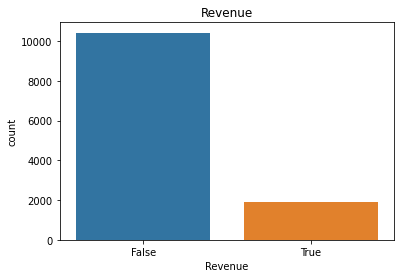

In [290]:
sns.countplot(x = df['Revenue'])
plt.title('Revenue') # we dont have much revenue :) but i know if page value incerasing we are getting revenue

In [291]:
df["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [321]:
bool_features = [col for col in df.columns if df[col].dtype == 'bool']
print("Boolean features :",bool_features)
obj_features = [col for col in df.columns if df[col].dtype == 'object']
print("Object features:", obj_features)

Boolean features : ['Weekend', 'Revenue']
Object features: ['Month', 'VisitorType']


Object features: ['Month', 'VisitorType']


In [294]:
df['Revenue']=df['Revenue'].astype(int)
df['Weekend']=df['Weekend'].astype(int)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,1,0


In [295]:
df = pd.get_dummies(data = df, columns=['Month', 'VisitorType'], drop_first=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1


In [296]:
df_corr=df.corr()
df_corr["Revenue"].abs().sort_values(ascending=False).nlargest(5)

Revenue          1.00
PageValues       0.49
ExitRates        0.21
ProductRelated   0.16
Month_Nov        0.15
Name: Revenue, dtype: float64

In [297]:
df.shape

(12330, 27)

In [298]:
df2=df.copy() # bu burada birazcık dursun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [333]:
#Split data
X=df.drop("Revenue",axis=1)
y=df["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [334]:
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:26<00:00,  1.11it/s]


In [337]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.90,0.78,0.78,0.90,0.82
NearestCentroid,0.82,0.77,0.77,0.84,0.06
LGBMClassifier,0.90,0.77,0.77,0.89,0.35
PassiveAggressiveClassifier,0.87,0.76,0.76,0.87,0.06
BernoulliNB,0.85,0.76,0.76,0.86,0.05
RandomForestClassifier,0.90,0.75,0.75,0.89,1.23
DecisionTreeClassifier,0.86,0.75,0.75,0.87,0.12
AdaBoostClassifier,0.89,0.75,0.75,0.88,1.14
BaggingClassifier,0.89,0.75,0.75,0.89,0.59


In [303]:
"""df3=df.copy()"""

'df3=df.copy()'

In [304]:
"""X=df3.drop("Revenue",axis=1)
y=df3["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)"""

'X=df3.drop("Revenue",axis=1)\ny=df3["Revenue"]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)'

In [305]:
"""from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# SMOTE yöntemi ile aşırı örnekleme uygulanması
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Aşırı örneklenmiş veri setinin gösterilmesi
print(X_train_resampled.shape)
print(y_train_resampled.shape)"""

'from sklearn.model_selection import train_test_split\nfrom imblearn.over_sampling import SMOTE\n\n\n# SMOTE yöntemi ile aşırı örnekleme uygulanması\nsm = SMOTE()\nX_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)\n\n# Aşırı örneklenmiş veri setinin gösterilmesi\nprint(X_train_resampled.shape)\nprint(y_train_resampled.shape)'

In [306]:
"""y_train_resampled.value_counts()"""

'y_train_resampled.value_counts()'

In [307]:
"""# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_resampled, X_test,y_train_resampled, y_test)
models"""

'# fit all models\nclf = LazyClassifier(predictions=True)\nmodels, predictions = clf.fit(X_train_resampled, X_test,y_train_resampled, y_test)\nmodels'

In [308]:
"""df4=df.copy()"""

'df4=df.copy()'

In [309]:
"""from sklearn.model_selection import train_test_split
X=df4.drop("Revenue",axis=1)
y=df4["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)"""

'from sklearn.model_selection import train_test_split\nX=df4.drop("Revenue",axis=1)\ny=df4["Revenue"]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)'

In [310]:
"""y.value_counts()"""

'y.value_counts()'

In [311]:
"""from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_train_resampled, y_train_resampled = ad.fit_resample(X_train, y_train)
y_train_resampled.value_counts()"""

'from imblearn.over_sampling import ADASYN\nad = ADASYN()\nX_train_resampled, y_train_resampled = ad.fit_resample(X_train, y_train)\ny_train_resampled.value_counts()'

In [312]:
"""# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_resampled, X_test,y_train_resampled, y_test)
models"""

'# fit all models\nclf = LazyClassifier(predictions=True)\nmodels, predictions = clf.fit(X_train_resampled, X_test,y_train_resampled, y_test)\nmodels'